<a href="https://colab.research.google.com/github/kaylangu/DS4002-Project3/blob/main/SCRIPTS/exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python notebook outlines all the scripts used in the Exploratory Data Analysis phase of this project.


In [1]:
!pip install "deeplake<4"

In [2]:
import deeplake
ds = deeplake.load('hub://activeloop/wiki-art')

/usr/local/lib/python3.10/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.0.2) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/wiki-art



-

hub://activeloop/wiki-art loaded successfully.



In [3]:
ds.visualize()

HINT: Please forward the port - 56549 to your local machine, if you are running on the cloud.


 * Serving Flask app 'dataset_visualizer'


In [5]:
from deeplake.core.chunk_engine import ReadSampleFromChunkError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None  # remove image pixel limit

The following cell will take a long time to run, so it is recommended to run on a separate machine using Rivanna for higher computing power (GPUs).

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# histogram of image sizes
if 'images' in ds.tensors:
    width = []
    height = []
    for sample in ds:
        try:
            img = sample['images'].numpy()
            width.append(img.shape[1])
            height.append(img.shape[0])
        except (OSError, ReadSampleFromChunkError):  # catch errors
            print("Skipping corrupted or unreadable image.")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(width, bins=20)
    plt.title('Distribution of Image Width')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(height, bins=20)
    plt.title('Distribution of Image Height')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


KeyboardInterrupt: 

The following dictionary was pulled directly from the dataset's ['Analytics' tab](https://app.activeloop.ai/activeloop/wiki-art/firstdbf9474d461a19e9333c2fd19b46115348f?utm_source=docs&utm_medium=datasets). Given the extremely large nature of the dataset, we found it best to take the pre-established data summaries.

In [10]:
import pandas as pd
labels = {
    'Art Style': ['Ukiyo-e', 'Synthetic Cubism', 'Symbolism', 'Romanticism', 'Rococo',
                  'Realism', 'Post Impressionism', 'Pop Art', 'Pointillism', 'Northern Renaissance',
                  'New Realism', 'Naive Art Primitivism', 'Minimalism', 'Mannerism Late Renaissance',
                  'Impressionism', 'High Renaissance', 'Fauvism', 'Expressionism', 'Early Renaissance',
                  'Cubism', 'Contemporary Realism', 'Color Field Painting', 'Baroque', 'Art Nouveau Modern',
                  'Analytical Cubism', 'Action Painting', 'Abstract Expressionism'],
    'Frequency': [1167, 216, 4527, 7015, 2089, 10733, 6451, 1483, 513, 2550, 314, 2405, 1337, 1279, 13060,
                  1343, 934, 6736, 1391, 2235, 481, 1615, 4241, 4328, 110, 98, 2782]
}

df = pd.DataFrame(labels)
df

,Art Style,Frequency
0,Ukiyo-e,1167
1,Synthetic Cubism,216
2,Symbolism,4527
3,Romanticism,7015
4,Rococo,2089
5,Realism,10733
6,Post Impressionism,6451
7,Pop Art,1483
8,Pointillism,513
9,Northern Renaissance,2550


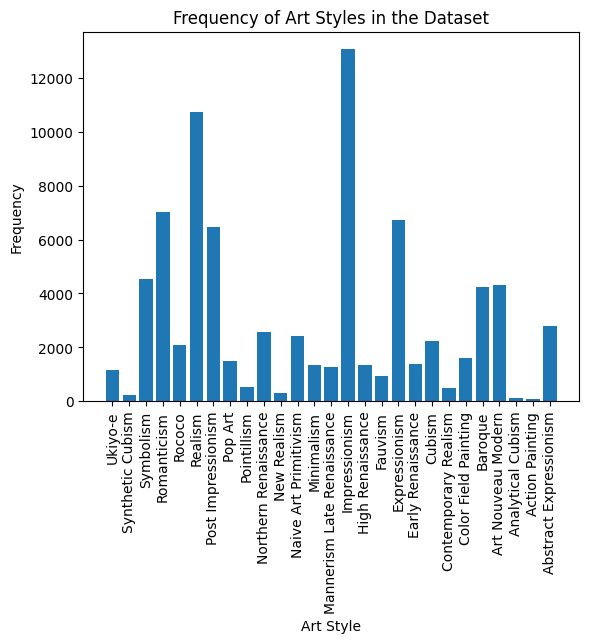

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(df['Art Style'], df['Frequency'])
plt.xticks(rotation=90)
plt.xlabel('Art Style')
plt.ylabel('Frequency')
plt.title('Frequency of Art Styles in the Dataset')
plt.show()